<a href="https://colab.research.google.com/github/MehdiMaboudi/2021-issdl-gdansk/blob/main/MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import tensorflow as tf

from tensorflow import keras

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
#from sklearn.metrics import RootMeanSquaredError


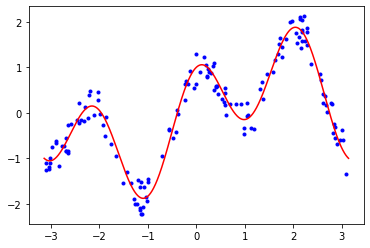

In [9]:
def f(X): return np.sin(X) + np.cos(3*X)
np.random.seed(seed=int(time.time()))  # seeding random generator

a = -1*np.pi  # domain min
b = np.pi  # domain max


x = (b - a) * np.random.random_sample(150) + a  # input
y = f(x) + np.random.uniform(-.4, .4, (150,))  # output


SplitRatio = .7 # split input samples of data
border = int(len(x)*SplitRatio)
xtr, ytr = x[:border,], y[:border,]  # Training samples
xte, yte = x[border:,], y[border:,]  # Testing samples


fig = plt.plot(x, y, 'b.')  # plotting training samples

xr = np.arange(a, b, .001)
fig = plt.plot(xr, f(xr), 'r')  # plotting the real function


In [3]:


# Constructing a Multilayer Perceptron
model = Sequential()    # Feed forward Network
model.add(Dense(4, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1))  # output layer

# stochastic gradient descent (sgd) optimization
#model.compile(loss='mean_squared_error', optimizer='sgd')
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])


Streaming output truncated to the last 5000 lines.
Epoch 7502/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 7503/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 7504/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 7505/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 7506/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 7507/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 7508/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 7509/10000
4/4 [==============================] - 0s 4ms/step - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 7510/10000
4/4 [==============================]

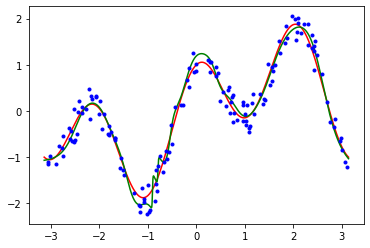

'\nRMS:  1.99770915462\nTraining Time: 78.9976 s\nPrediction Time: 210.7198 ms\n'

In [8]:
tm = time.time()
hist = model.fit(xtr, ytr, epochs=10000, verbose=1)
tm_train = time.time() - tm


tm = time.time()
results = model.predict(xr)  # predicting values over the function domain
tm_predict = time.time() - tm

#print("RMS: ", tf.keras.metrics.MeanSquaredError(xte, yte))  # calculating RMSE on test samples
# print(model.evaluate(xtr, ytr)) # print loss and accuracy
print("Training Time: %.4f s" % tm_train)
print("Prediction Time: %.4f ms" % (tm_predict * 1000))

'''
RMS:  1.99770915462
Training Time: 78.9976 s
Prediction Time: 210.7198 ms
'''


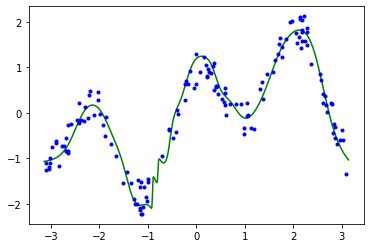

'\nRMS:  1.99770915462\nTraining Time: 78.9976 s\nPrediction Time: 210.7198 ms\n'

In [10]:
plt.plot(xr, results, 'g')  # plotting the predicted values over the function domain
fig = plt.plot(x, y, 'b.')  # plotting training samples

plt.show()



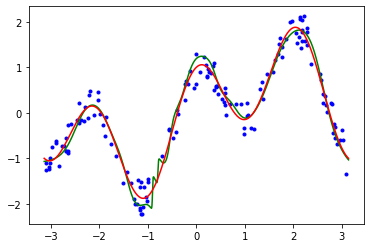

In [14]:
fig = plt.plot(x, y, 'b.')  # plotting training samples
plt.plot(xr, results, 'g')  # plotting the predicted values over the function domain

xr = np.arange(a, b, .001)
plt.plot(xr, f(xr), 'r')  # plotting the real function
plt.show()
